In [1]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
impo₩rt radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
from radio_beam import Beams
from astropy.convolution import convolve
import seaborn as sns
W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv = w51conv + 'w51n_new_nocorr_in_area_B6_conv.fits'
#w51n_b3_conv = w51conv + 'w51n_B3_conv.fits'
#w51e_b3_conv = w51conv + 'w51e_B3_conv.fits'
w51e_b6_conv = w51conv + 'w51e_new_nocorr_in_area_B6_conv.fits'


w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'








def convolveb3b6(b3data, b6data, outdir, label):
    fitsdata_b6 = fits.open(b6data)
    imageb6 = fitsdata_b6[0].data
    if len(imageb6.shape)!=2:
        imageb6 = imageb6[0][0]
    fitsdata_b3 = fits.open(b3data)
    imageb3 = fitsdata_b3[0].data
    if len(imageb3.shape)!=2:
        imageb3 = imageb3[0][0]
    
    hdrNB6 = fits.getheader(b6data)  
    hdrNB3 = fits.getheader(b3data)  
    wcsNB6 = WCS(hdrNB6,naxis=2)
    wcsNB3 = WCS(hdrNB3,naxis=2)

    my_beamNB3 = Beam.from_fits_header(hdrNB3)
    my_beamNB6 = Beam.from_fits_header(hdrNB6)

    scaleNB6 = wcsNB6.proj_plane_pixel_scales()[0]
    scaleNB3 = wcsNB3.proj_plane_pixel_scales()[0]

    beamsN =  Beams(beams=[my_beamNB3,my_beamNB6])

    common_beam = beamsN.common_beam()
    print(common_beam.major)
    
    area_rat_B3 = (common_beam.sr/my_beamNB3.sr).value

    if area_rat_B3!=1:
        print('convolution', b3data)
        kernelB3 = common_beam.deconvolve(my_beamNB3).as_kernel(scaleNB3)
        conv_B3 = convolve(imageb3, kernelB3,preserve_nan=True)
        conv_B3 = conv_B3 * area_rat_B3
        if common_beam.major.unit=='arcsec':
            hdrNB3['BMAJ'] = common_beam.major.value/3600
            hdrNB3['BMIN'] = common_beam.minor.value/3600
            hdrNB3['BPA'] = common_beam.pa.value
        else:
            hdrNB3['BMAJ'] = common_beam.major.value
            hdrNB3['BMIN'] = common_beam.minor.value
            hdrNB3['BPA'] = common_beam.pa.value
        fits.writeto(outdir+'/%s_conv1.fits'%label, conv_B3, hdrNB3, overwrite = True)
    
    area_rat_B6 = (common_beam.sr/my_beamNB6.sr).value
    if area_rat_B6 != 1:
        print('convolution', b6data)
        kernelB6 = common_beam.deconvolve(my_beamNB6).as_kernel(scaleNB6)
        conv_B6 = convolve(imageb6, kernelB6,preserve_nan=True)  
        conv_B6 = conv_B6 * area_rat_B6
        if common_beam.major.unit=='arcsec':
            hdrNB6['BMAJ'] = common_beam.major.value/3600
            hdrNB6['BMIN'] = common_beam.minor.value/3600
            hdrNB6['BPA'] = common_beam.pa.value
        else:
            hdrNB6['BMAJ'] = common_beam.major.value
            hdrNB6['BMIN'] = common_beam.minor.value
            hdrNB6['BPA'] = common_beam.pa.value
        fits.writeto(outdir+'/%s_conv2.fits'%label, conv_B6, hdrNB6, overwrite = True)
    return conv_B6

def get_peak_flux(image, wcs, table, band='b3' ):
     
    t = Table.read(table)
    peakx = t['%s_xsky'%band]
    peaky = t['%s_ysky'%band]
    peakxy_sky = np.vstack((peakx,peaky)).T
    peakxy_pix= wcs.wcs_world2pix(peakxy_sky,0)
    
    flux = [image[int(xypix[1]),int(xypix[0])] if xypix[1]<image.shape[0] and xypix[1]>0 else -1 for xypix in peakxy_pix]

    
    return np.array(flux)






In [2]:


outdir = '/orange/adamginsburg/w51/TaehwaYoo/conv_test/'
w51n_b3_conv = convolveb3b6(w51n_b3_almaimf, w51n_b3_tt0, outdir, 'w51n_b3_highres_to_almaimf')










7.929775449965e-05 deg
convolution /orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits


In [6]:
fitsdata_b3 = fits.open(w51n_b3_tt0)
imageb3 = fitsdata_b3[0].data
if len(imageb3.shape)!=2:
    imageb3 = imageb3[0][0]
hdrNb3 = fits.getheader(w51n_b3_tt0)  
wcsNb3 = WCS(hdrNb3,naxis=2)
peakflux_highres = get_peak_flux(imageb3, wcsNb3, w51n_matched_catalog)
print(peakflux_highres)

peakflux_conv_wosave = get_peak_flux(w51n_b3_conv, wcsNb3, w51n_matched_catalog)
print(peakflux_conv_wosave)

fitsdata_b3 = fits.open(outdir+'w51n_b3_highres_to_almaimf_conv2.fits')
imageb3 = fitsdata_b3[0].data
if len(imageb3.shape)!=2:
    imageb3 = imageb3[0][0]
hdrNb3 = fits.getheader(outdir+'w51n_b3_highres_to_almaimf_conv2.fits')  
wcsNb3 = WCS(hdrNb3,naxis=2)
peakflux_conv_wsave = get_peak_flux(imageb3, wcsNb3, w51n_matched_catalog)
print(peakflux_conv_wsave)

[ 4.04246355e-04  1.02065771e-03  1.77767256e-03  4.14415747e-02
  1.92468055e-03  6.74271898e-04  1.78234850e-03  9.70561698e-04
  1.11398567e-03  4.79906704e-03  9.56663303e-03  2.21421453e-03
  4.35294234e-04  2.22899904e-03  5.14748797e-04  7.31341890e-04
  3.74442036e-03  2.60304497e-03  2.10916251e-03  2.17455346e-03
  1.65035238e-03  1.29464068e-04  1.28760468e-04  7.40035845e-04
  1.27146218e-03  1.91794315e-04  2.21243812e-04  2.96984334e-04
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  6.12344069e-04  5.55757491e-04  1.35637587e-04  2.39639412e-04
  3.37866222e-04  2.18313726e-04  1.35396389e-04  2.44314753e-04
  1.33242429e-04  4.40465752e-04  2.21212918e-04  1.53276647e-04
  5.87595045e-04  6.08230126e-04  2.47116579e-04  2.31082187e-04
  6.00888510e-04  2.19044145e-04  1.58907773e-04  1.50586784e-04
  3.28999362e-04  6.34535041e-04  2.19430251e-04  1.78506598e-04
  1.61583375e-04  2.60853703e-04  1.91130865e-04  5.33379382e-04
  2.90274649e-04  5.41470

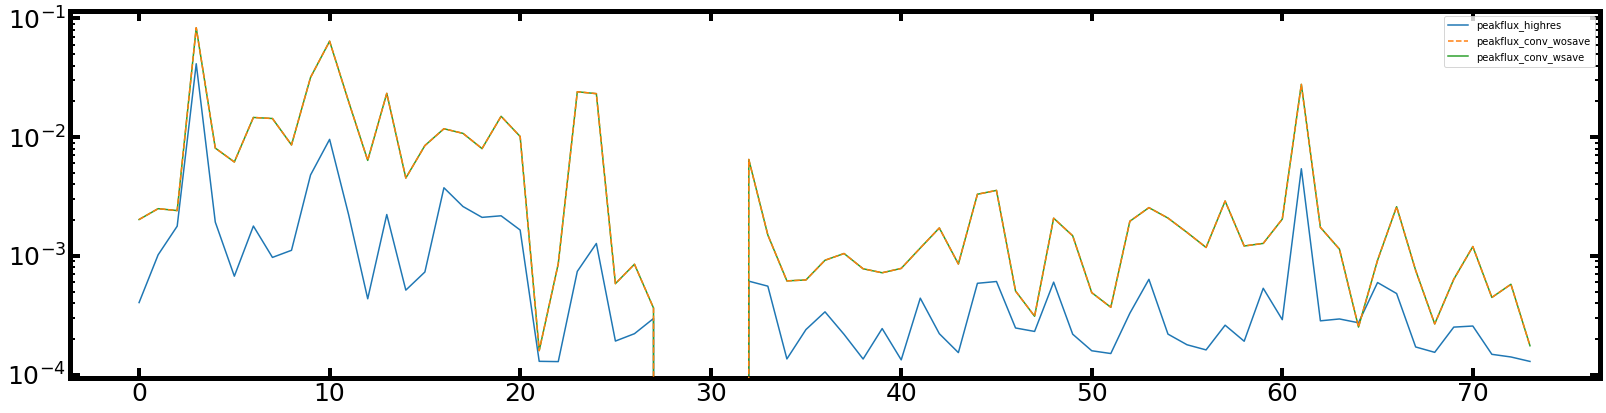

In [10]:
import matplotlib as mpl
plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_axes([0.15,0.15,0.85,0.85])
x = np.arange(len(peakflux_highres))
ax1.plot(x, peakflux_highres, label='peakflux_highres')
ax1.plot(x, peakflux_conv_wosave, label='peakflux_conv_wosave', ls='dashed',zorder=50
    )
ax1.plot(x, peakflux_conv_wsave, label='peakflux_conv_wsave')
ax1.legend()
ax1.set_yscale('log')
